In [1]:
from rlway.schedules import Schedule

In [2]:
schedule = Schedule(6, 3)

schedule.df.at[0, 0] = [0, 1]
schedule.df.at[2, 0] = [1, 2]
schedule.df.at[3, 0] = [2, 3]
schedule.df.at[4, 0] = [3, 4]

schedule.df.at[1, 1] = [1, 2]
schedule.df.at[2, 1] = [2, 3]
schedule.df.at[3, 1] = [3, 4]
schedule.df.at[5, 1] = [4, 5]

schedule.df.at[0, 2] = [2, 3]
schedule.df.at[2, 2] = [3, 4]
schedule.df.at[3, 2] = [4, 5]
schedule.df.at[4, 2] = [5, 6]

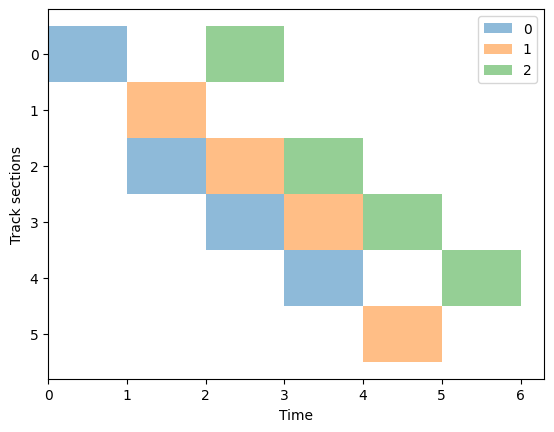

In [3]:
schedule.plot()

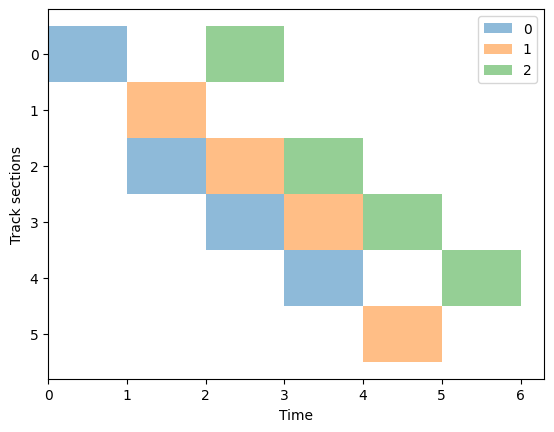

In [5]:
schedule.sort().plot()

In [6]:
schedule.df

0         1         2     
     s    e    s    e    s    e
0    0    1  NaN  NaN    2    3
1  NaN  NaN    1    2  NaN  NaN
2    1    2    2    3    3    4
3    2    3    3    4    4    5
4    3    4  NaN  NaN    5    6
5  NaN  NaN    4    5  NaN  NaN

In [7]:
import pandas as pd

In [8]:
schedule2x2 = Schedule(2, 2)
schedule2x2.set(0, 0, [0., 1.])
assert schedule2x2._df.loc[0, 0].values.tolist() == [0., 1.]

In [19]:
from pandas.testing import assert_frame_equal
assert_frame_equal(schedule2x2._df, schedule2x2.df)

In [27]:
schedule.lengths

,0,1,2
0,1,NaN,1
1,NaN,1,NaN
2,1,1,1
3,1,1,1
4,1,NaN,1
5,NaN,1,NaN


In [21]:
import numpy as np

In [25]:
expected = pd.DataFrame(
    {
        0: [0, np.nan, 1, 2, 3, np.nan],
        1: [np.nan, 1, 2, 3, np.nan, 4],
        2: [2, np.nan, 3, 4, 5, np.nan],
    },
    dtype=int
)

assert_frame_equal(schedule.starts, expected)

/tmp/ipykernel_5750/3362386707.py:1: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  expected = pd.DataFrame(


In [30]:
three_trains = schedule

In [31]:
assert three_trains.trajectory(0) == [0, 2, 3, 4]
assert three_trains.trajectory(1) == [1, 2, 3, 5]
assert three_trains.trajectory(2) == [0, 2, 3, 4]

In [40]:
two_trains = Schedule(6, 2)

two_trains.df.at[0, 0] = [0, 1]
two_trains.df.at[2, 0] = [1, 2]
two_trains.df.at[3, 0] = [2, 3]
two_trains.df.at[4, 0] = [3, 4]

two_trains.df.at[1, 1] = [1, 2]
two_trains.df.at[2, 1] = [2, 3]
two_trains.df.at[3, 1] = [3, 4]
two_trains.df.at[5, 1] = [4, 5]

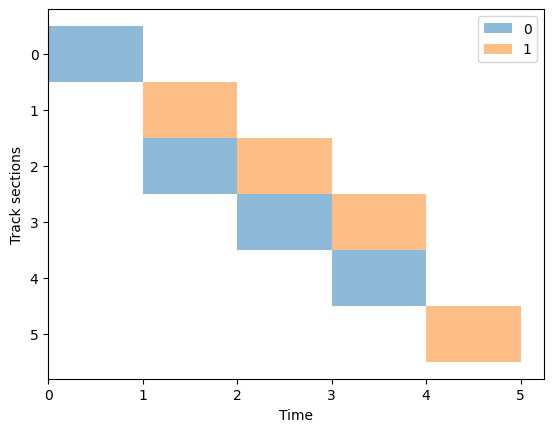

In [41]:
two_trains.plot()

In [42]:
for i in two_trains.track_sections:
    print(two_trains.is_a_point_switch(0, 1, i),
          two_trains.is_just_after_a_point_switch(0, 1, i))

False False
False False
True False
False True
False False
False False


In [45]:
two_trains.shift_train_departure(0, 2)

     0         1     
     s    e    s    e
0    2    3  NaN  NaN
1  NaN  NaN    1    2
2    3    4    2    3
3    4    5    3    4
4    5    6  NaN  NaN
5  NaN  NaN    4    5

In [56]:
two_trains.shift_train_departure(0, 2).df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   s       4 non-null      object
 1   e       4 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes


In [55]:
pd.DataFrame([
        [2, 3],
        [np.nan, np.nan],
        [3, 4],
        [4, 5],
        [5, 6],
        [np.nan, np.nan]
    ])

,0,1
0,2.0,3.0
1,NaN,NaN
2,3.0,4.0
3,4.0,5.0
4,5.0,6.0
5,NaN,NaN


In [76]:
assert_frame_equal(two_trains.df[1], two_trains.shift_train_after(0,1,2).df[1])

In [77]:
two_trains.shift_train_after(0, 1, 2).df[0].values

array([[0, 3],
       [nan, nan],
       [3, 4],
       [4, 5],
       [5, 6],
       [nan, nan]], dtype=object)